In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv("Mall_Customers.csv")
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Transform The Data

In [14]:
scaler = StandardScaler()
df[["Annual Income (k$)_T","Spending Score (1-100)_T"]] = scaler.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_T,Spending Score (1-100)_T
0,1,Male,19,15,39,-1.738999,-0.434801
1,2,Male,21,15,81,-1.738999,1.195704
2,3,Female,20,16,6,-1.700830,-1.715913
3,4,Female,23,16,77,-1.700830,1.040418
4,5,Female,31,17,40,-1.662660,-0.395980
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.268791,1.118061
196,197,Female,45,126,28,2.497807,-0.861839
197,198,Male,32,126,74,2.497807,0.923953
198,199,Male,32,137,18,2.917671,-1.250054


<h1>Clustering The Data</h1>
<h2>Identifying the Optimum number of clusters</h2>
there are a number of ways to identify the optimum number of cluster. The method we will be seeing is known as the elbow method. the elbow plot allows us to plot the inertia, which is a measure of how well the data was clustered by the K-Means algorithm, against the number of clusters. From this plot,, we are looking for a point where the intertia begins to slow.

In [38]:
def optimize_k_means(data,max_k):
    means = []
    inertia = []
    for i in range(1,max_k):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        means.append(i)
        inertia.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize = (10,6))
    plt.plot(means,inertia,'o-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

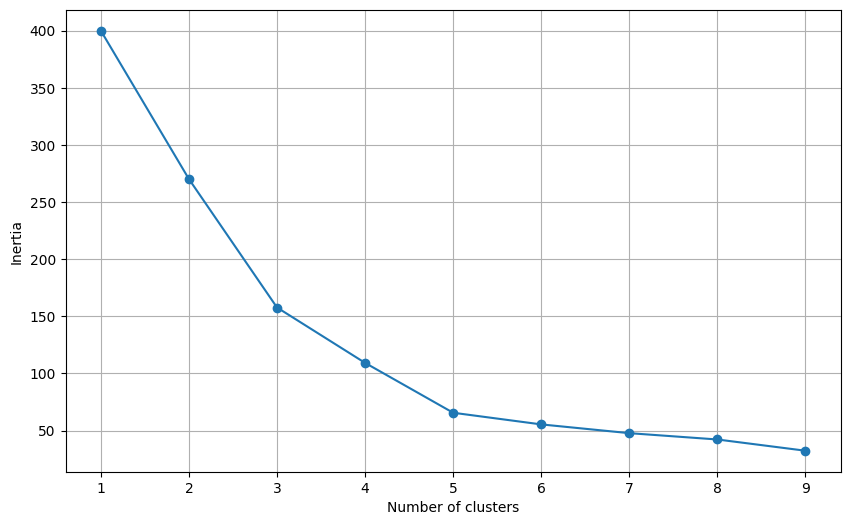

In [39]:
optimize_k_means(df[["Annual Income (k$)_T","Spending Score (1-100)_T"]],10)

In the plot above, we can see at 5 number of clusters that the graph kind of plateous. so for this demonstration we will use that. 
<h1>Applyng K Means Clustering</h1>
now that we have found out at what number of clusters that the gradual decrease is appropriate. we can apply our K-Means clustering

In [35]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(df[["Annual Income (k$)_T","Spending Score (1-100)_T"]])
df["Kmeans_5"] = Kmeans.labels_
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_T,Spending Score (1-100)_T,Kmeans_5
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,100.500000,38.850000,60.560000,50.200000,-2.131628e-16,-1.465494e-16,1.580000
std,57.879185,13.969007,26.264721,25.823522,1.002509e+00,1.002509e+00,1.221088
min,1.000000,18.000000,15.000000,1.000000,-1.738999e+00,-1.910021e+00,0.000000
25%,50.750000,28.750000,41.500000,34.750000,-7.275093e-01,-5.997931e-01,1.000000
50%,100.500000,36.000000,61.500000,50.000000,3.587926e-02,-7.764312e-03,1.000000
75%,150.250000,49.000000,78.000000,73.000000,6.656748e-01,8.851316e-01,2.000000
max,200.000000,70.000000,137.000000,99.000000,2.917671e+00,1.894492e+00,4.000000


we can see our minimum and maximum point for the each data. so we can use that to set limits for our plot below.
<h1>Ploting the results</h1>

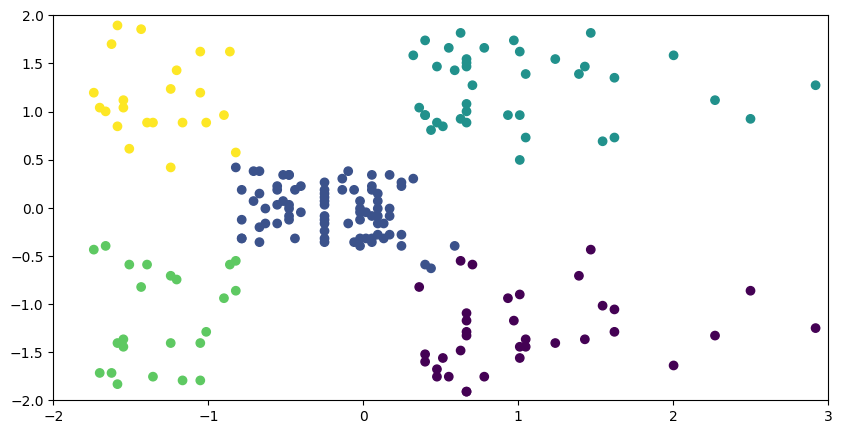

In [36]:
fig = plt.subplots(figsize = (10,5))
plt.scatter(x=df["Annual Income (k$)_T"],y=df["Spending Score (1-100)_T"],c=df["Kmeans_5"])
plt.xlim(-2,3)
plt.ylim(-2,2)
plt.show()